# Collect Data: Import Libraries

In [406]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [407]:
loan_data=pd.read_csv('loan_data.csv')
loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [408]:
print("dataset len before cleaning-",len(loan_data))

dataset len before cleaning- 614


# Analyzing Data

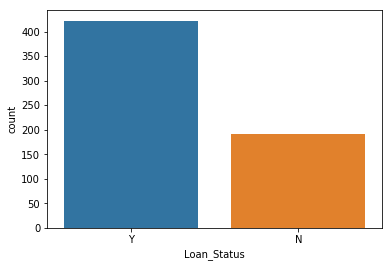

In [409]:
sns.countplot(x='Loan_Status',data=loan_data)

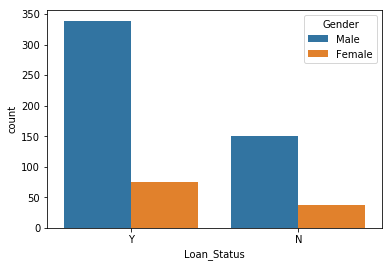

In [410]:
sns.countplot(x='Loan_Status',hue='Gender',data=loan_data)

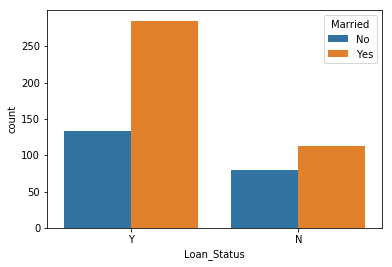

In [411]:
sns.countplot(x='Loan_Status',hue='Married',data=loan_data)

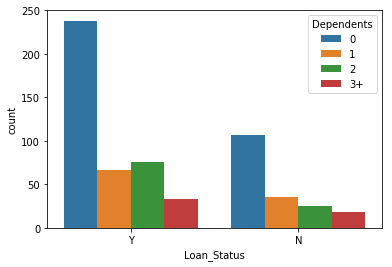

In [412]:
sns.countplot(x='Loan_Status',hue='Dependents',data=loan_data)

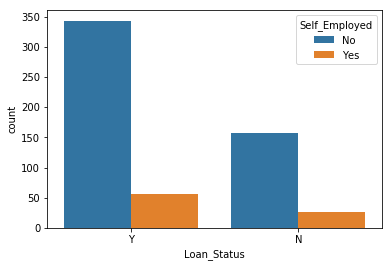

In [413]:
sns.countplot(x='Loan_Status',hue='Self_Employed',data=loan_data)

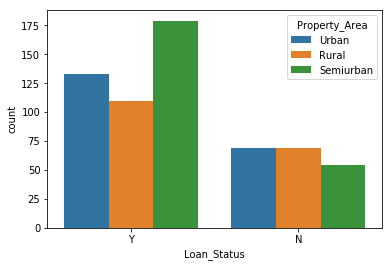

In [414]:
sns.countplot(x='Loan_Status',hue='Property_Area',data=loan_data)

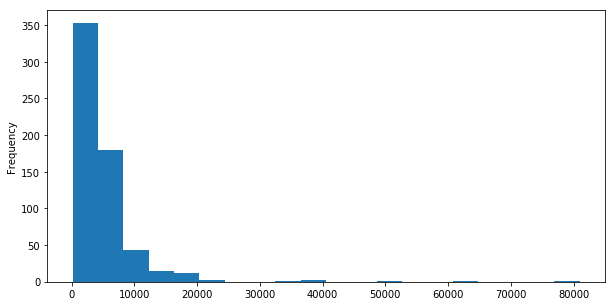

In [416]:
loan_data['ApplicantIncome'].plot.hist(bins=20, figsize=(10,5))

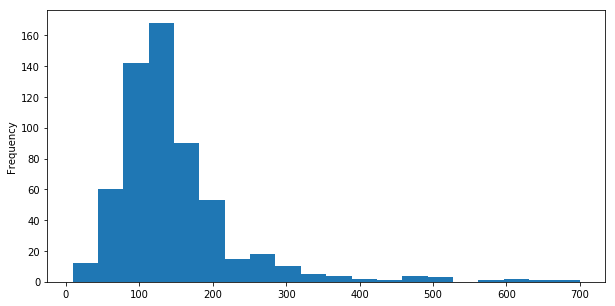

In [338]:
loan_data['LoanAmount'].plot.hist(bins=20, figsize=(10,5))

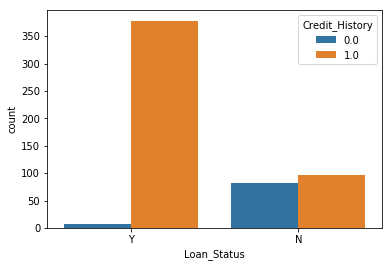

In [417]:
sns.countplot(x='Loan_Status',hue='Credit_History',data=loan_data)

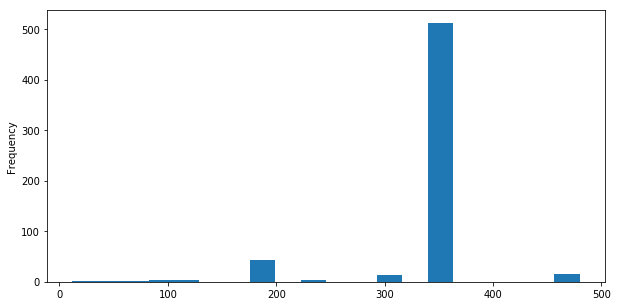

In [340]:
loan_data['Loan_Amount_Term'].plot.hist(bins=20, figsize=(10,5))

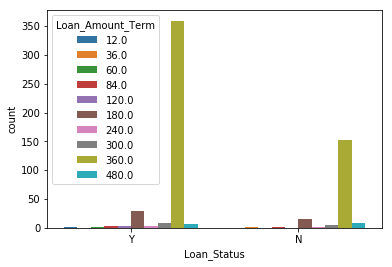

In [341]:
sns.countplot(x='Loan_Status',hue='Loan_Amount_Term',data=loan_data)

In [342]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [343]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

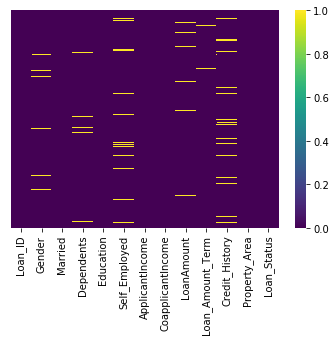

In [344]:
sns.heatmap(loan_data.isnull(),yticklabels=False,cmap='viridis')

In [345]:
#loan_data.dropna(inplace=True)

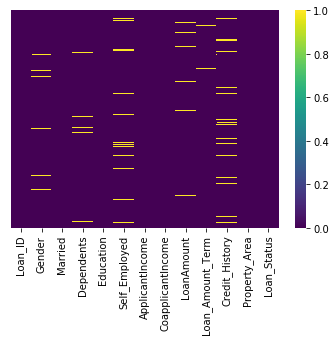

In [346]:
sns.heatmap(loan_data.isnull(),yticklabels=False,cmap='viridis')

In [347]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [348]:
print("dataset len after cleaning-",len(loan_data))

dataset len after cleaning- 614


In [349]:
loan_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [350]:
gender=pd.get_dummies(loan_data['Gender'],drop_first=True)

In [351]:
married=pd.get_dummies(loan_data['Married'],drop_first=True)

In [352]:
education=pd.get_dummies(loan_data['Education'],drop_first=True)

In [353]:
self_Employed=pd.get_dummies(loan_data['Self_Employed'],drop_first=True)

In [354]:
property_Area=pd.get_dummies(loan_data['Property_Area'],drop_first=True)

In [355]:
final_data=pd.concat([loan_data,gender,married,education,self_Employed,property_Area],axis=1)
final_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes,Not Graduate,Yes,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0,0,0


In [356]:
final_data.drop(['Gender','Married','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

In [357]:
final_data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,Not Graduate,Yes,Semiurban,Urban
0,LP001002,0,5849,0.0,NaN,360.0,1.0,Y,1,0,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,1


In [358]:
loan_Status=pd.get_dummies(final_data['Loan_Status'],drop_first=True)

In [359]:
final_data=pd.concat([final_data,loan_Status],axis=1)

In [360]:
final_data.drop(['Loan_Status'],axis=1,inplace=True)

In [361]:
final_data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
0,LP001002,0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,1,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [362]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Dependents           599 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Male                 614 non-null uint8
Yes                  614 non-null uint8
Not Graduate         614 non-null uint8
Yes                  614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
Y                    614 non-null uint8
dtypes: float64(4), int64(1), object(2), uint8(7)
memory usage: 37.9+ KB


In [363]:
final_data.drop(['Loan_ID'],axis=1,inplace=True)

In [364]:
#replace "Dependents" column object value "3+" to int 3
final_data.Dependents=final_data.Dependents.replace({"3+": 3})
# change data type of column "Dependents" from object to int
final_data["Dependents"] = pd.to_numeric(final_data["Dependents"])

In [365]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Dependents           599 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Male                 614 non-null uint8
Yes                  614 non-null uint8
Not Graduate         614 non-null uint8
Yes                  614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
Y                    614 non-null uint8
dtypes: float64(5), int64(1), uint8(7)
memory usage: 33.1 KB


In [366]:
# rename target column "Y" to status
final_data = final_data.rename(columns={'Y': 'status'}) 

In [367]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Dependents           599 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Male                 614 non-null uint8
Yes                  614 non-null uint8
Not Graduate         614 non-null uint8
Yes                  614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
status               614 non-null uint8
dtypes: float64(5), int64(1), uint8(7)
memory usage: 33.1 KB


In [368]:
final_data=final_data.apply(lambda x: x.fillna(x.mean()),axis=0)
final_data.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Male                 0
Yes                  0
Not Graduate         0
Yes                  0
Semiurban            0
Urban                0
status               0
dtype: int64

# Split target variable

In [397]:
X_train=final_data.drop('status',axis=1)
y_train=final_data['status']

# Train LogisticRegression model for training dataset

In [370]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

/home/yp/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/yp/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/yp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Test data pre-processing

In [371]:
loan_test_data=pd.read_csv('loan_data_test.csv')

In [372]:
loan_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [373]:
loan_test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [374]:
#loan_test_data.dropna(inplace=True)

In [375]:
loan_test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [376]:
gender=pd.get_dummies(loan_test_data['Gender'],drop_first=True)
married=pd.get_dummies(loan_test_data['Married'],drop_first=True)
education=pd.get_dummies(loan_test_data['Education'],drop_first=True)
self_Employed=pd.get_dummies(loan_test_data['Self_Employed'],drop_first=True)
property_Area=pd.get_dummies(loan_test_data['Property_Area'],drop_first=True)
final_data_test=pd.concat([loan_test_data,gender,married,education,self_Employed,property_Area],axis=1)
final_data_test.drop(['Gender','Married','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

In [377]:
final_data_test.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban
0,LP001015,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,LP001022,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,LP001031,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
3,LP001035,2,2340,2546,100.0,360.0,NaN,1,1,0,0,0,1
4,LP001051,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1


In [378]:
Loan_ID=final_data_test.Loan_ID
final_data_test.drop(['Loan_ID'],axis=1,inplace=True)
#replace "Dependents" column object value "3+" to int 3
final_data_test.Dependents=final_data_test.Dependents.replace({"3+": 3})
# change data type of column "Dependents" from object to int
final_data_test["Dependents"] = pd.to_numeric(final_data_test["Dependents"])

In [379]:
final_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Dependents           357 non-null float64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Male                 367 non-null uint8
Yes                  367 non-null uint8
Not Graduate         367 non-null uint8
Yes                  367 non-null uint8
Semiurban            367 non-null uint8
Urban                367 non-null uint8
dtypes: float64(4), int64(2), uint8(6)
memory usage: 19.4 KB


In [380]:
final_data_test=final_data_test.apply(lambda x: x.fillna(x.mean()),axis=0)

In [381]:
X_test=final_data_test

In [382]:
X_test.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Male                 0
Yes                  0
Not Graduate         0
Yes                  0
Semiurban            0
Urban                0
dtype: int64

# Predict loan status for testing dataset

In [383]:
X_test=sc.fit_transform(X_test)
predictions=logmodel.predict(X_test)

/home/yp/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/yp/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [384]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [385]:
predictions = ['Y' if i > 0 else 'N' for i in predictions]

In [386]:
len(predictions)

367

In [387]:
# map loan_id with prediction
result=np.asarray(list(zip(Loan_ID,predictions)))

In [388]:
result

array([['LP001015', 'Y'],
       ['LP001022', 'Y'],
       ['LP001031', 'Y'],
       ['LP001035', 'Y'],
       ['LP001051', 'Y'],
       ['LP001054', 'Y'],
       ['LP001055', 'Y'],
       ['LP001056', 'N'],
       ['LP001059', 'Y'],
       ['LP001067', 'Y'],
       ['LP001078', 'Y'],
       ['LP001082', 'Y'],
       ['LP001083', 'Y'],
       ['LP001094', 'N'],
       ['LP001096', 'Y'],
       ['LP001099', 'Y'],
       ['LP001105', 'Y'],
       ['LP001107', 'Y'],
       ['LP001108', 'Y'],
       ['LP001115', 'Y'],
       ['LP001121', 'Y'],
       ['LP001124', 'Y'],
       ['LP001128', 'Y'],
       ['LP001135', 'Y'],
       ['LP001149', 'Y'],
       ['LP001153', 'N'],
       ['LP001163', 'Y'],
       ['LP001169', 'Y'],
       ['LP001174', 'Y'],
       ['LP001176', 'Y'],
       ['LP001177', 'Y'],
       ['LP001183', 'Y'],
       ['LP001185', 'Y'],
       ['LP001187', 'Y'],
       ['LP001190', 'Y'],
       ['LP001203', 'N'],
       ['LP001208', 'Y'],
       ['LP001210', 'Y'],
       ['LP0

In [389]:
# numpy array to dataframe and add columns name
result = pd.DataFrame(result,columns=['Loan_ID','Loan_Status'])

In [390]:
result.head(5)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [398]:
# save results in csv file
result.to_csv (r'result.csv', index = None, header=True)
X_train=final_data[['Semiurban','Male','Credit_History','Dependents']]